('The accuracy of the prediction: ', 92.24137931034483)
('Error Performance: ', 7.758620689655174)
104.0
110.0
4.0
14.0
('Sensitivity of the Democrats: ', 0.9649122807017544)
('Sensitivity of the Republicans: ', 0.8813559322033898)
('Specificity of the Democrats: ', 0.8813559322033898)
('Specificity of the Republicans: ', 0.9649122807017544)
('Positive predicted value of the Democrats: ', 0.8870967741935484)
('Positive predicted value of the Republicans: ', 0.9629629629629629)
('Negative predicted value of the Democrats: ', 0.9629629629629629)
('Negative predicted value of the Republicans: ', 0.8870967741935484)


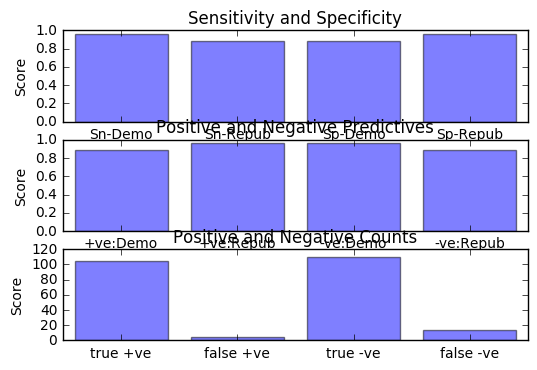

('Runtime:', 1.3653966081320585)


In [ ]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn import tree

#Reading the data
def type_to_numeric(x):
	if x == 'democrat':
		return 0
	if x == 'republican':
		return 1
	if x == 'n':
		return 0	
	if x == 'y':
		return 1

#Reading the data from the file
def read_data(file):

	data_file = pd.read_csv('datafile.txt', sep="\t", header = None)
	data_file.columns = ["Party","handicapped_infants","water_project_cost_sharing","adoption_of_the_budget_resolution","physician_fee_freeze",	"el_salvador_aid",	"religious_groups_in_schools",	"nti_satellite_test_ban","aid_to_nicaraguan_contras","mx_missile", "immigration","synfuels_corporation_cutback","education_spending","superfund_right_to_sue",	"crime","duty_free_exports","export_administration_act_sa"]

	columns = ["Party","handicapped_infants","water_project_cost_sharing","adoption_of_the_budget_resolution","physician_fee_freeze",	"el_salvador_aid",	"religious_groups_in_schools", "nti_satellite_test_ban","aid_to_nicaraguan_contras","mx_missile","immigration","synfuels_corporation_cutback","education_spending","superfund_right_to_sue",	"crime","duty_free_exports","export_administration_act_sa"]

	for column in columns:
		data_file[column] = data_file[column].apply(type_to_numeric)


	# print(data_file[:5])	
	# print(len(data_file))

	data_file_updated = data_file.dropna()

	# print(data_file_updated[:5])
	# print(len(data_file_updated))


	data = data_file_updated[["handicapped_infants",	"water_project_cost_sharing",	"adoption_of_the_budget_resolution",	
		"physician_fee_freeze",	"el_salvador_aid",	"religious_groups_in_schools",	"nti_satellite_test_ban",	
		"aid_to_nicaraguan_contras",	"mx_missile",	"immigration",	"synfuels_corporation_cutback",	
		"education_spending",	"superfund_right_to_sue",	"crime",	
		"duty_free_exports",	"export_administration_act_sa"]]
	label = data_file_updated["Party"]
	
	return np.array(data), np.array(label)    


#Accuracy of the results
def accuracy(true_class, pred_class):           #Calculating the accuracy of the classification
    correct = 0
    for x in range(len(true_class)):
        if true_class[x] == pred_class[x]:
            correct += 1
    return (correct/float(len(true_class))) * 100.0

#Required Statistics of the results	
def statistics(true_class,pred_class):
	true_positive = 0.00
	true_negative = 0.00
	false_positive = 0.00
	false_negative = 0.00

	for x in range(len(true_class)):
		if pred_class[x] == 1:
			if pred_class[x] == true_class[x]:
				true_positive += 1	
			if pred_class[x] != true_class[x]:
				false_negative += 1	

		if pred_class[x] == 0:
			if pred_class[x] == true_class[x]:
				true_negative += 1	
			if pred_class[x] != true_class[x]:
				false_positive += 1	
		
	print(true_positive)
	print(true_negative)
	print(false_positive)
	print(false_negative)
	specificity_democrat = true_positive/(true_positive + false_negative)
	specificity_republican = true_negative/(true_negative + false_positive)
	sensitivity_democrat = true_negative/(true_negative + false_positive)
	sensitivity_republican = true_positive/(true_positive + false_negative)	

	positive_predictive_value_democrat = true_negative/(true_negative + false_negative)		
	negative_predictive_value_democrat = true_positive/(true_positive + false_positive)
	positive_predictive_value_republican = true_positive/(true_positive + false_positive)
	negative_predictive_value_republican = true_negative/(true_negative + false_negative)

	print("Sensitivity of the Democrats: ", sensitivity_democrat)
	print("Sensitivity of the Republicans: ", sensitivity_republican)
	print("Specificity of the Democrats: ", specificity_democrat)
	print("Specificity of the Republicans: ", specificity_republican)
	print("Positive predicted value of the Democrats: ", positive_predictive_value_democrat)
	print("Positive predicted value of the Republicans: ", positive_predictive_value_republican)
	print("Negative predicted value of the Democrats: ", negative_predictive_value_democrat)
	print("Negative predicted value of the Republicans: ", negative_predictive_value_republican)
	
	#Plotting Sensitivity and Specificity Data
	objects = ('Sn-Demo', 'Sn-Repub', 'Sp-Demo', 'Sp-Repub')
	y_pos = np.arange(len(objects))
	performance = [sensitivity_democrat, sensitivity_republican, specificity_democrat, specificity_republican]
 
	plt.subplot(311)
	plt.bar(y_pos, performance, align='center', alpha=0.5)
	plt.xticks(y_pos, objects)
	plt.ylabel('Score')
	plt.title('Sensitivity and Specificity')
	
	#Plotting Positive and Negative Predictives 
	objects = ("+ve:Demo","+ve:Repub","-ve:Demo","-ve:Repub")
	y_pos = np.arange(len(objects))
	performance = [positive_predictive_value_democrat, positive_predictive_value_republican, negative_predictive_value_democrat, negative_predictive_value_republican]
 
	plt.subplot(312)
	plt.bar(y_pos, performance, align='center', alpha=0.5)
	plt.xticks(y_pos, objects)
	plt.ylabel('Score')
	plt.title('Positive and Negative Predictives')
	
	#Plotting true positive, true negative, false positive and false negative
	objects = ("true +ve","false +ve","true -ve","false -ve")
	y_pos = np.arange(len(objects))
	performance = [true_positive, false_positive, true_negative, false_negative]
 
	plt.subplot(313)
	plt.bar(y_pos, performance, align='center', alpha=0.5)
	plt.xticks(y_pos, objects)
	plt.ylabel('Score')
	plt.title('Positive and Negative Counts')
 
	plt.show()

def main():

	# initialize runtime
	start = time.clock()

	#Reading the data from the txt file( Two variables)
	data, label = read_data("datafile.txt")

	#KNN Algorithm
	knn = KNeighborsClassifier()
	knn.fit(data, label) 			#Fitting the data

	#Predicting the data test into class
	true_class = label
	pred_class = knn.predict(data)

	#Assesing the accuracy of the predicted class
	acc = accuracy(true_class,pred_class)

	#Printing the accuracy of prediction
	print( "The accuracy of the prediction: ", acc )
	print("Error Performance: ", 100-acc)

	#Statistics of the results
	statistics(true_class,pred_class)

	#Retrieving the time
	run_time = time.clock() - start
	print("Runtime:", run_time)

if __name__ == '__main__':
	main()
    
#Validation dataset analysis 60-20-20 using LeaveOneOut on KNN and Decision Tree, to choose best of both models
def main():

	# initialize runtime
	start = time.clock()

	#Reading the data from the txt file( Two variables)
	data, label = read_data("datafile.txt")

	#Splitting the data to 80-20
	dtrain, dtest, dtr_label, dtest_label = train_test_split(data, label, test_size=0.20, random_state=1)

	# Validation using LeaveOneOut
	loo = LeaveOneOut()
	cv_val = loo.get_n_splits(dtrain)
	
	# Using KFold to set n_splits to n data from loo
	k_fold = KFold(n_splits = cv_val)
	
	#Using LOO on KNN
	#Also finding the best parameter for k neighbours in the process
	knnVal = 0
	max_k = 0
	for k in range(1,8,2):
		knn = KNeighborsClassifier(n_neighbors = k)
		val = cross_val_score(knn, dtrain, dtr_label, cv=k_fold, n_jobs=-1)
		
		if(val.mean() > knnVal):
			knnVal = val.mean()
			max_k = k
			
	#Using LOO on Decision Tree
	clf = tree.DecisionTreeClassifier()
	val = cross_val_score(clf, dtrain, dtr_label, cv=k_fold, n_jobs=-1)
	clfVal = val.mean();
	
	#Figuring better of both models
	if(knnVal > clfVal):
		#Fitting the data
		knn = KNeighborsClassifier(n_neighbors = max_k)
		knn.fit(dtrain,dtr_label)		

		#Predicting the data test into class
		true_class = dtest_label
		pred_class = knn.predict(dtest)
		chosenModel = "KNN"
	else:
		#Fitting the data
		clf.fit(dtrain, dtr_label)
		
		#Predicting the data test into class
		true_class = dtest_label
		pred_class = clf.predict(dtest)
		chosenModel = "Decision Tree"

	#Assessing the accuracy of the predicted class of using KNN
	acc = accuracy(true_class,pred_class)

	#Printing the accuracy of prediction
	print("Prediction was done using: ", chosenModel)
	print( "The accuracy of the prediction: ", acc )
	print("Error Performance: ", 100-acc)

	# Statistics of the results
	statistics(true_class,pred_class)

	#Retrieving the time
	run_time = time.clock() - start
	print("Runtime:", run_time)

if __name__ == '__main__':
	main()